# Assignment 1B by Group 1

- build an AHP model to choose shoes
- export an Excel sheet
- (edit the sheet)
- import the sheet
- calculate the global priorities, synthesized results and supermatrix
- do a sensitivity analysis

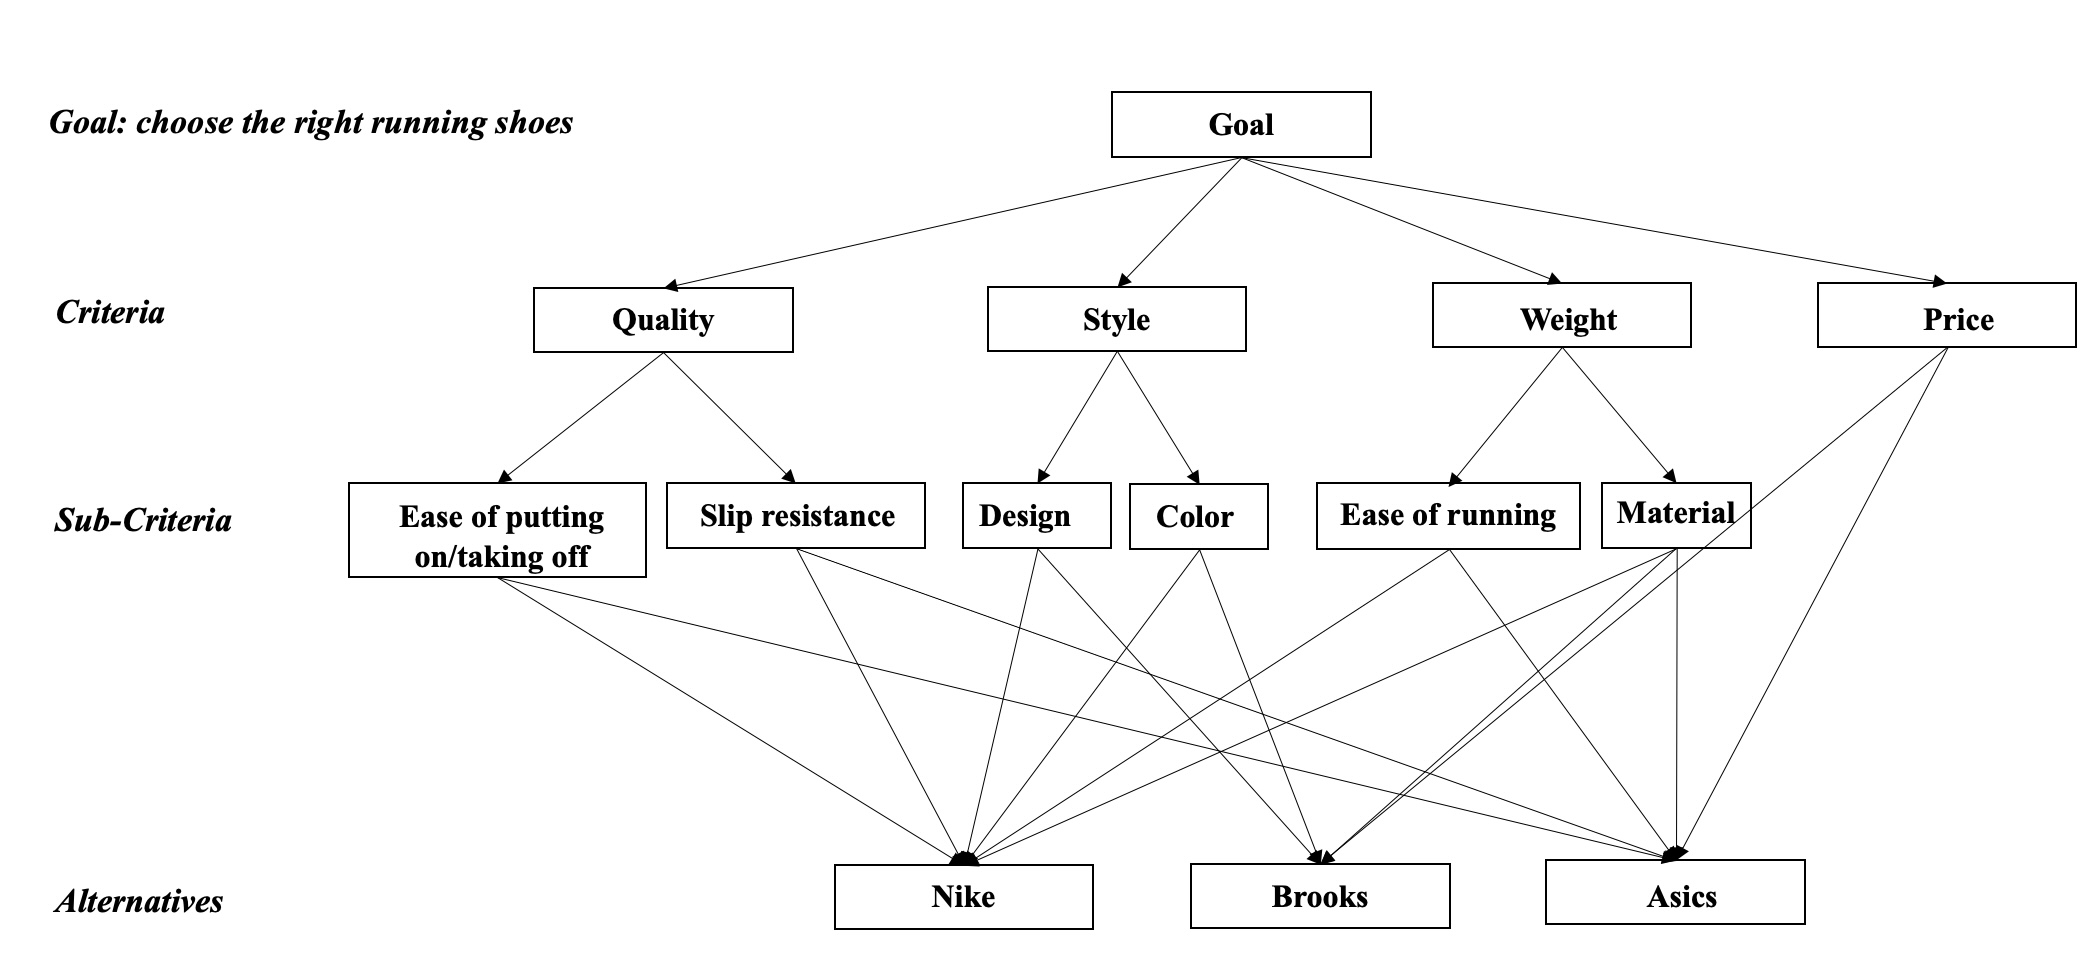

In [3]:
# from AHPLib import *
from AhpAnpLib import inputs_AHPLib as input
from AhpAnpLib import structs_AHPLib as str
from AhpAnpLib import calcs_AHPLib as calc

## Create a model

In [4]:
shoesModel=str.Model()

# check
print(shoesModel)


Model Type:pairwise
Nodes: []
 Clusters: []
 Node Connections: []
 Cluster Connections: []


## Create nodes

In [5]:
# making a goal node
goal_node=str.Node("GoalNode", 1) # IDはあまり重要じゃないみたい？
print(goal_node)

GoalNode order: 1


In [6]:
# making criteria
quality=str.Node("Quality", 2)
style=str.Node("Style", 3)
weight=str.Node("Weight", 4)
price=str.Node("Price", 5)

# check
print(quality, "\n", style, "\n", weight, "\n", price)

Quality order: 2 
 Style order: 3 
 Weight order: 4 
 Price order: 5


In [7]:
# making sub-criteria
easy_of_putting_on=str.Node("EasyOfPuttingOn", 6)
slip_resistance=str.Node("SlipResistance", 7)
design=str.Node("Design", 8)
color=str.Node("Color", 9)
easy_of_running=str.Node("EasyOfRunning", 10)
material=str.Node("Material", 11)

# check
print(easy_of_putting_on, "\n", slip_resistance, "\n", design, "\n", color, "\n", easy_of_running, "\n", material)

EasyOfPuttingOn order: 6 
 SlipResistance order: 7 
 Design order: 8 
 Color order: 9 
 EasyOfRunning order: 10 
 Material order: 11


In [8]:
# making alternatives
alt1=str.Node("Nike", 12)
alt2=str.Node("Brooks", 13)
alt3=str.Node("Asics", 14)

print(alt1)
print(alt2)
print(alt3)

Nike order: 12
Brooks order: 13
Asics order: 14


## Create clusters

In [9]:
# making clusters
cluster0=str.Cluster("1_Goal", 1) 
cluster1=str.Cluster("2_Criteria", 2)
cluster2a=str.Cluster("3a_SubCriteria", 4)
cluster2b=str.Cluster("3b_SubCriteria", 5)
cluster2c=str.Cluster("3c_SubCriteria", 6)
cluster3=str.Cluster("4_Alternatives", 7)

print(cluster0, "\n", cluster1, "\n", cluster2a, "\n", cluster2b, "\n", cluster2c, "\n", cluster3)

1_Goal order: 1 
 2_Criteria order: 2 
 3a_SubCriteria order: 4 
 3b_SubCriteria order: 5 
 3c_SubCriteria order: 6 
 4_Alternatives order: 7


## Add nodes to clusters

In [10]:
# Add the goal node to Goal cluster
cluster0.addNode2Cluster(goal_node)

In [11]:
# Add 4 nodes to Criteria cluster
cluster1.addNode2Cluster(quality)
cluster1.addNode2Cluster(style)
cluster1.addNode2Cluster(weight)
cluster1.addNode2Cluster(price)

In [12]:
# Add 6 nodes to Sub Criteria cluster
cluster2a.addNode2Cluster(easy_of_putting_on)
cluster2a.addNode2Cluster(slip_resistance)
cluster2b.addNode2Cluster(design)
cluster2b.addNode2Cluster(color)
cluster2c.addNode2Cluster(easy_of_running)
cluster2c.addNode2Cluster(material)

In [13]:
# Add the alternative nodes to Alternatives cluster
cluster3.addNode2Cluster(alt1)
cluster3.addNode2Cluster(alt2)
cluster3.addNode2Cluster(alt3)

In [14]:
# check
cluster0.printWithNodes()
cluster1.printWithNodes()
cluster2a.printWithNodes()
cluster2b.printWithNodes()
cluster2c.printWithNodes()
cluster3.printWithNodes()

Cluster: 1_Goal with nodes: [GoalNode order: 1]

Cluster: 2_Criteria with nodes: [Quality order: 2, Style order: 3, Weight order: 4, Price order: 5]

Cluster: 3a_SubCriteria with nodes: [EasyOfPuttingOn order: 6, SlipResistance order: 7]

Cluster: 3b_SubCriteria with nodes: [Design order: 8, Color order: 9]

Cluster: 3c_SubCriteria with nodes: [EasyOfRunning order: 10, Material order: 11]

Cluster: 4_Alternatives with nodes: [Nike order: 12, Brooks order: 13, Asics order: 14]



## Add the clusters to my model

In [15]:
# Add the clusters to my model
shoesModel.addCluster2Model(cluster0)
shoesModel.addCluster2Model(cluster1)
shoesModel.addCluster2Model(cluster2a)
shoesModel.addCluster2Model(cluster2b)
shoesModel.addCluster2Model(cluster2c)
shoesModel.addCluster2Model(cluster3)

In [16]:
print(shoesModel)


Model Type:pairwise
Nodes: [GoalNode order: 1, Quality order: 2, Style order: 3, Weight order: 4, Price order: 5, EasyOfPuttingOn order: 6, SlipResistance order: 7, Design order: 8, Color order: 9, EasyOfRunning order: 10, Material order: 11, Nike order: 12, Brooks order: 13, Asics order: 14]
 Clusters: [1_Goal order: 1, 2_Criteria order: 2, 3a_SubCriteria order: 4, 3b_SubCriteria order: 5, 3c_SubCriteria order: 6, 4_Alternatives order: 7]
 Node Connections: []
 Cluster Connections: []


## Set up node connections

In [17]:
# connect the goal node and Criteria cluster
shoesModel.addNodeConnectionFromNodeToAllNodesOfCluster("GoalNode","2_Criteria")

In [18]:
# connect Quality node to 2 nodes
shoesModel.addNodeConnectionFromTo("Quality","EasyOfPuttingOn")
shoesModel.addNodeConnectionFromTo("Quality","SlipResistance")

In [19]:
# connect Style node to 2 nodes
shoesModel.addNodeConnectionFromTo("Style","Design")
shoesModel.addNodeConnectionFromTo("Style","Color")

In [20]:
# connect Weight node to 2 nodes
shoesModel.addNodeConnectionFromTo("Weight","EasyOfRunning")
shoesModel.addNodeConnectionFromTo("Weight","Material")

In [21]:
# connect Sub Criteria cluster to Alternatives cluster
shoesModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("3a_SubCriteria","4_Alternatives")
shoesModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("3b_SubCriteria","4_Alternatives")
shoesModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("3c_SubCriteria","4_Alternatives")
shoesModel.addNodeConnectionFromNodeToAllNodesOfCluster("Price","4_Alternatives")

In [22]:
# connect Price node to 3 alternative nodes directly
shoesModel.addNodeConnectionFromTo("Price","Nike")
shoesModel.addNodeConnectionFromTo("Price","Brooks")
shoesModel.addNodeConnectionFromTo("Price","Asics")

Trying to add n11. Node already in connections.
Trying to add n12. Node already in connections.
Trying to add n13. Node already in connections.


In [21]:
# check all connections in the model
shoesModel.showAllNodeConnections()

Connections from node GoalNode order: 1
 to: Quality order: 2
 to: Style order: 3
 to: Weight order: 4
 to: Price order: 5
Connections from node Quality order: 2
 to: EasyOfPuttingOn order: 6
 to: SlipResistance order: 7
Connections from node Style order: 3
 to: Design order: 8
 to: Color order: 9
Connections from node Weight order: 4
 to: EasyOfRunning order: 10
 to: Material order: 11
Connections from node Price order: 5
 to: Nike order: 12
 to: Brooks order: 13
 to: Asics order: 14
Connections from node EasyOfPuttingOn order: 6
 to: Nike order: 12
 to: Brooks order: 13
 to: Asics order: 14
Connections from node SlipResistance order: 7
 to: Nike order: 12
 to: Brooks order: 13
 to: Asics order: 14
Connections from node Design order: 8
 to: Nike order: 12
 to: Brooks order: 13
 to: Asics order: 14
Connections from node Color order: 9
 to: Nike order: 12
 to: Brooks order: 13
 to: Asics order: 14
Connections from node EasyOfRunning order: 10
 to: Nike order: 12
 to: Brooks order: 13
 t

In [23]:
input.genFullQuest(shoesModel,"important")

[['With respect to GoalNode, which one is more important: Quality or Style ? By how much?',
  'With respect to GoalNode, which one is more important: Quality or Weight ? By how much?',
  'With respect to GoalNode, which one is more important: Quality or Price ? By how much?',
  'With respect to GoalNode, which one is more important: Style or Weight ? By how much?',
  'With respect to GoalNode, which one is more important: Style or Price ? By how much?',
  'With respect to GoalNode, which one is more important: Weight or Price ? By how much?'],
 ['With respect to Quality, which one is more important: EasyOfPuttingOn or SlipResistance ? By how much?'],
 ['With respect to Style, which one is more important: Design or Color ? By how much?'],
 ['With respect to Weight, which one is more important: EasyOfRunning or Material ? By how much?'],
 ['With respect to Price, which one is more important: Nike or Brooks ? By how much?',
  'With respect to Price, which one is more important: Nike or As

In [25]:
input.genFirstLineAboveDiagQuest(shoesModel,"dominant")

[['With respect to GoalNode, which one is more dominant: Quality or Style ? By how much?',
  'With respect to GoalNode, which one is more dominant: Quality or Weight ? By how much?',
  'With respect to GoalNode, which one is more dominant: Quality or Price ? By how much?',
  'With respect to GoalNode, which one is more dominant: Style or Weight ? By how much?',
  'With respect to GoalNode, which one is more dominant: Weight or Price ? By how much?'],
 ['With respect to Quality, which one is more dominant: EasyOfPuttingOn or SlipResistance ? By how much?'],
 ['With respect to Style, which one is more dominant: Design or Color ? By how much?'],
 ['With respect to Weight, which one is more dominant: EasyOfRunning or Material ? By how much?'],
 ['With respect to Price, which one is more dominant: Nike or Brooks ? By how much?',
  'With respect to Price, which one is more dominant: Nike or Asics ? By how much?',
  'With respect to Price, which one is more dominant: Brooks or Asics ? By how 

## Export

In [24]:
input.export4ExcelQuestFull(shoesModel, "shoesModel_Excel_empty.xlsx")

(Editted "shoesModel.xlsx")

## Import

In [25]:
inputFilePath="../../IO FIles/shoesModel_Excel_filledin.xlsx"
outputFilepath = "../../IO FIles/shoesModel_Results.xlsx"

calc.calcAHPMatricesSave2File(shoesModel,inputFilePath,outputFilepath,False,True,True)

Saved inconsistency for cluster-node :  2_Criteria - GoalNode
Saved inconsistency for cluster-node :  3a_SubCriteria - Quality
Saved inconsistency for cluster-node :  3b_SubCriteria - Style
Saved inconsistency for cluster-node :  3c_SubCriteria - Weight
Saved inconsistency for cluster-node :  4_Alternatives - Price
Saved inconsistency for cluster-node :  4_Alternatives - EasyOfPuttingOn
Saved inconsistency for cluster-node :  4_Alternatives - SlipResistance
Saved inconsistency for cluster-node :  4_Alternatives - Design
Saved inconsistency for cluster-node :  4_Alternatives - Color
Saved inconsistency for cluster-node :  4_Alternatives - EasyOfRunning
Saved inconsistency for cluster-node :  4_Alternatives - Material
---------------------------------------------------------------------------

Inconsistency indices:
[0.045, 0.0, 0.0, 0.0, 0.0, 0.009, 0.009, 0.052, 0.001, 0.247, 0.052]
---------------------------------------------------------------------------

Priority vectors:
[array([0

multiplier 1.6213196073682963
supermatrix [[0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000]
 [0.383 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000]
 [0.090 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000]
 [0.271 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000]
 [0.255 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000]
 [0.000 0.600 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000]
 [0.000 0.400 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000]
 [0.000 0.000 0.600 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000]
 [0.000 0.000 0.400 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000]
 [0.000 0.000 0.000 0.800 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000]
 [0.000 0.000 0.000 0.200 0.000 0.000 0.000 0.000 0.000 0.000 0.000 

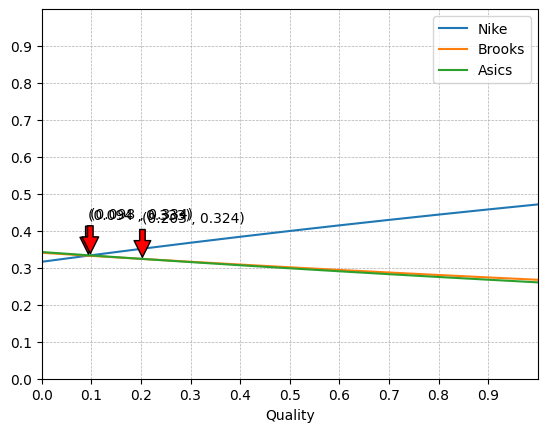

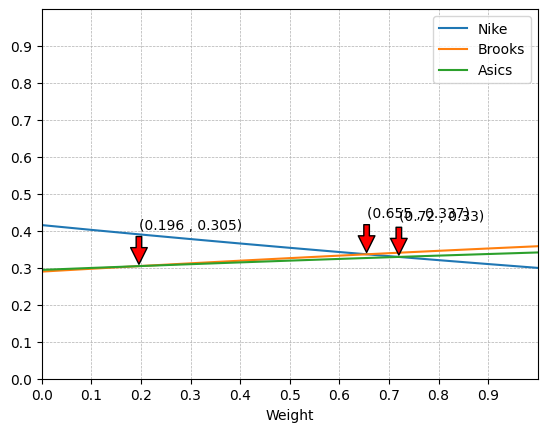

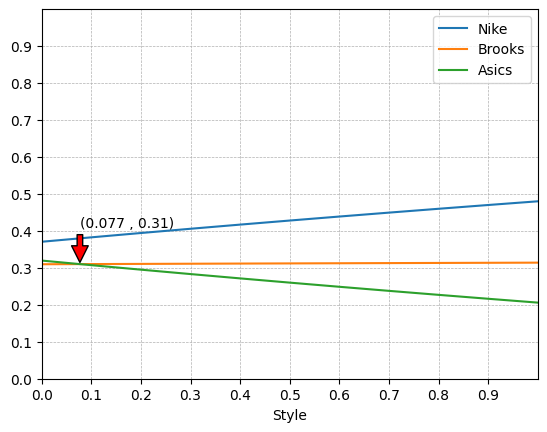

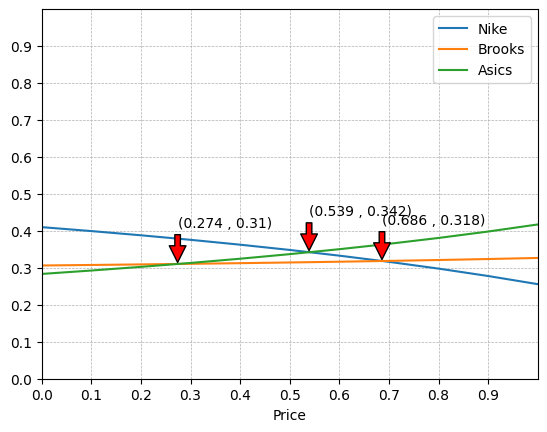

In [26]:
calc.sensitivityCellSupermatrixPlot(shoesModel,"4_Alternatives",outputFilepath,"Quality","Weight","Style","Price")